In [247]:
import numpy as np 
import matplotlib.pyplot as plt 
from sparse_rf.algs import *
from sparse_rf.modules import make_X, make_A, make_W
from sparse_rf.util import *
import sparse_rf.util.fns as fns 
import sparse_rf.util.polynomials as poly
from functools import partial
import random
import gc

In [274]:
d = 10
q = 5
N = 10000
n = N // comb(d, q)
m = 1000
fn = fns.fn21
ratio_train = 0.7
active = fourier
w_scale = 1/np.sqrt(q)

In [275]:
X = make_X(d, m, dist=partial(uniform, low=-1, high=1))
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

y = np.array(list(map(fn, X))) 
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

In [300]:
W = make_W(d, q, n=n, dist=partial(normal, stdev=w_scale))
A_train = make_A(X_train, W, active=active) / np.sqrt(n*comb(d, q))
A_test = make_A(X_test, W, active=active) / np.sqrt(n*comb(d, q))

In [301]:
K_train = make_K(X, kernel=partial(sparse_rbf, d=d, q=q, scale=w_scale))
K_test = make_K(X, X_test=X_test, kernel=partial(sparse_rbf, d=d, q=q, scale=w_scale))

In [302]:
w_K = np.sort(np.real(np.linalg.eig(K_train)[0]))[::-1]

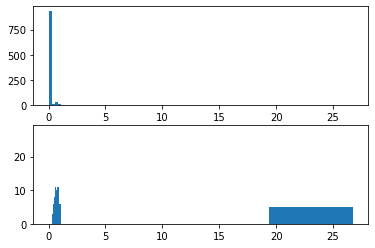

In [303]:
plt.subplot(211)
hist, bins, _ = plt.hist(w_K[1:], bins=100)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.subplot(212)
plt.hist(w_K[1:], bins=logbins)
# plt.xscale('log')
plt.show()

In [304]:
if N < m:
    K_train_hat = A_train.T@A_train
else:
    K_train_hat = A_train@A_train.T

w_A = np.sort(np.real(np.linalg.eig(K_train_hat)[0]))[::-1]

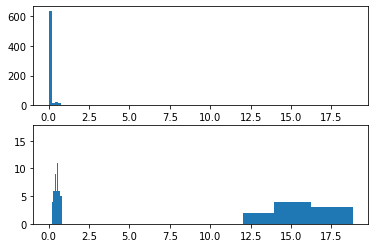

In [305]:
plt.subplot(211)
hist, bins, _ = plt.hist(w_A[1:], bins=100)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.subplot(212)
plt.hist(w_A[1:], bins=logbins)
# plt.xscale('log')
plt.show()

In [282]:
np.linalg.matrix_rank(K_train)

1000

In [309]:
np.linalg.matrix_rank(K_train_hat.astype())

700

In [311]:
K_train

array([[1.        , 0.8772613 , 0.68364106, ..., 0.8493652 , 0.83194415,
        0.90479391],
       [0.8772613 , 1.        , 0.49540049, ..., 0.7717058 , 0.69043313,
        0.81204469],
       [0.68364106, 0.49540049, 1.        , ..., 0.66980989, 0.5988718 ,
        0.64177303],
       ...,
       [0.8493652 , 0.7717058 , 0.66980989, ..., 1.        , 0.6685777 ,
        0.679347  ],
       [0.83194415, 0.69043313, 0.5988718 , ..., 0.6685777 , 1.        ,
        0.85181703],
       [0.90479391, 0.81204469, 0.64177303, ..., 0.679347  , 0.85181703,
        1.        ]])

In [312]:
K_train_hat

array([[1.        , 0.87516435, 0.68985681, ..., 0.748441  , 0.66723021,
        0.73047905],
       [0.87516435, 1.        , 0.49924293, ..., 0.67410942, 0.59638075,
        0.76833506],
       [0.68985681, 0.49924293, 1.        , ..., 0.55941758, 0.60437506,
        0.69760837],
       ...,
       [0.748441  , 0.67410942, 0.55941758, ..., 1.        , 0.84352582,
        0.66944032],
       [0.66723021, 0.59638075, 0.60437506, ..., 0.84352582, 1.        ,
        0.68152916],
       [0.73047905, 0.76833506, 0.69760837, ..., 0.66944032, 0.68152916,
        1.        ]])